[*********************100%***********************]  1 of 1 completed


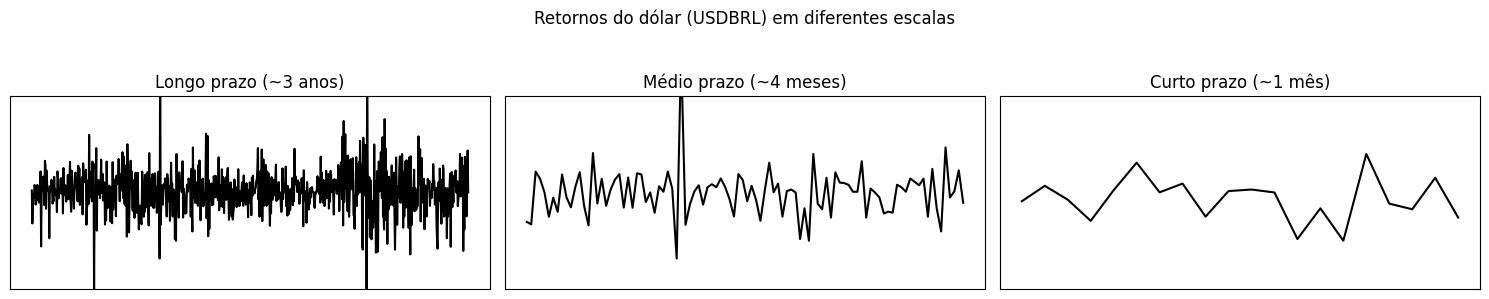

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar dados do dólar comercial (USDBRL)
data = yf.download("USDBRL=X", start="2018-01-01", end="2024-01-01")
returns = data["Close"].pct_change().dropna()

# Selecionar três janelas
long_term = returns.iloc[0:800]
medium_term = returns.iloc[200:300]
short_term = returns.iloc[250:270]

# Plotar
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
axes[0].plot(long_term.values, color='black')
axes[0].set_title("Longo prazo (~3 anos)")
axes[1].plot(medium_term.values, color='black')
axes[1].set_title("Médio prazo (~4 meses)")
axes[2].plot(short_term.values, color='black')
axes[2].set_title("Curto prazo (~1 mês)")

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(-0.05, 0.05)

plt.suptitle("Retornos do dólar (USDBRL) em diferentes escalas", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


[*********************100%***********************]  1 of 1 completed
/var/folders/qz/xf6nnp6d6vg2ph_t33lmvt200000gn/T/ipykernel_7375/1237036890.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  r = series.resample(freq).last().pct_change().dropna().iloc[-n:]


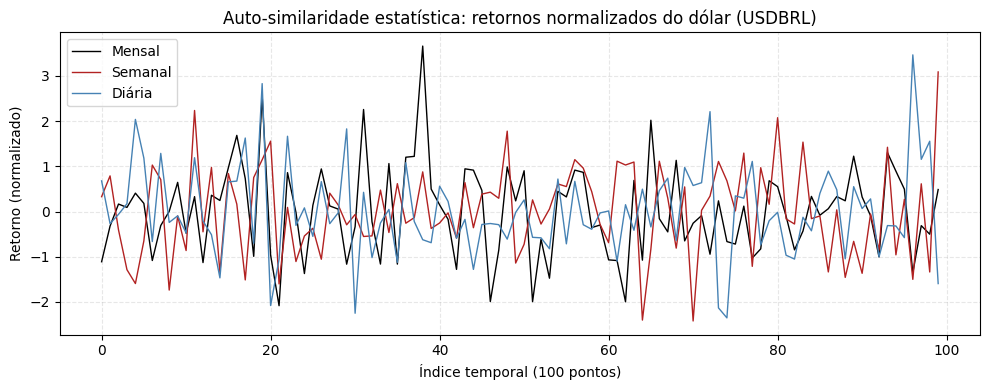

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar os dados
data = yf.download("USDBRL=X", start="2010-01-01")["Close"].dropna()

# Retornos normalizados
def normalized_returns(series, freq, n=100):
    r = series.resample(freq).last().pct_change().dropna().iloc[-n:]
    return (r - r.mean()) / r.std()

monthly = normalized_returns(data, "MS")
weekly = normalized_returns(data, "W")
daily = normalized_returns(data, "B")

# Plotar
plt.figure(figsize=(10, 4))
plt.plot(monthly.values, label="Mensal", color="black", linewidth=1)
plt.plot(weekly.values, label="Semanal", color="firebrick", linewidth=1)
plt.plot(daily.values, label="Diária", color="steelblue", linewidth=1)

plt.title("Auto-similaridade estatística: retornos normalizados do dólar (USDBRL)")
plt.ylabel("Retorno (normalizado)")
plt.xlabel("Índice temporal (100 pontos)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("retornos_normalizados_usdbrl.png", dpi=600)
plt.show()


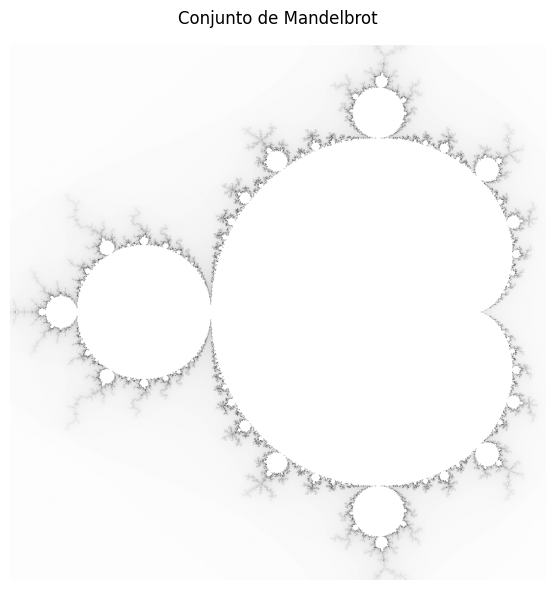

In [16]:
# Reimportar bibliotecas após reset
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar o Conjunto de Mandelbrot
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y
    Z = np.zeros_like(C)
    div_time = np.zeros(C.shape, dtype=int)

    mask = np.ones(C.shape, dtype=bool)

    for i in range(max_iter):
        Z[mask] = Z[mask] ** 2 + C[mask]
        mask_new = np.abs(Z) <= 2
        div_time[mask & ~mask_new] = i
        mask &= mask_new

    return div_time

# Gerar o conjunto
mandelbrot = mandelbrot_set(-1.5, 0.5, -1., 1, 1000, 1000, 200)

# Plotar
plt.figure(figsize=(6, 6))
plt.imshow(mandelbrot, extent=(-1.5, 0.5, -1, 1), cmap='binary')
plt.title("Conjunto de Mandelbrot", fontsize=12, pad=15)
plt.axis('off')
plt.tight_layout()
plt.savefig("conjunto_de_mandelbrot.png", dpi=300)
